## CLASIFICAR IMAGENES

<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'> Se importan librerías necesarias para el desarrollo del modelo </font> </p>

In [20]:
#-- Importación de librerías necesarias --
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import ReduceLROnPlateau

<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'> Se cargan las imágenes y etiquetas desde un archivo <i><b>.npz</b></i> que contiene un subconjunto del dataset CIFAR. </font> </p>





In [2]:
# -- Cargar los datos a trabajar --
data = np.load("cifar_subset_tf.npz")
images = data["images"]
labels = data["labels"]

<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'> Se cambia el formato de las imágenes de canales para que este al final (H, W, C), que es el formato estándar de TensorFlow. </font> </p>

In [3]:
#-- Se trasponen las imágenes para que el canal este al final --
images = np.transpose(images, (0, 2, 3, 1))  # (N, 32, 32, 3)

<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'> Se debe normalizar los datos para el modelo, pero al revisar los datos estan ya normalizados en valores entre -1.0 y 1.0. </font> </p>

In [4]:
#-- Se deben normalizar los datos, pero el conjunto ya esta normalizado entre valores -1.0 y 1.0 --
print("Tipo:", images.dtype)
print("Rango:", images.min(), images.max())

Tipo: float32
Rango: -1.0 1.0


<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'> Se reasignan las etiquetas para que sean consecutivas desde 0 (por ejemplo: [2, 5, 7] → [0, 1, 2]).</font> </p>

In [5]:
#-- Remapear etiquetas --
unique_labels = np.unique(labels)
label_map = {old: new for new, old in enumerate(unique_labels)}
labels = np.array([label_map[l] for l in labels])
num_classes = len(np.unique(labels))
num_classes

12

<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'> Se separan los datos en entrenamiento y prueba (80%-20%).</font> </p>


In [7]:
#-- Dividir en entrenamiento y prueba --
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42, stratify=labels
)

<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'>Creación de dataset con tensorFlow. </font> </p>

In [8]:
#-- Crear datasets TensorFlow --
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(1000).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(64)

<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'> Visualización de una imagen al azar para confirmar que la carga de datos es correcta.</font> </p>

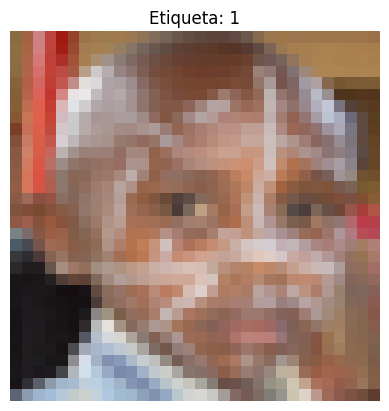

In [9]:
#-- Ver una imagen para confirmar --
for images_batch, labels_batch in train_dataset.take(1):
    img = images_batch[0]
    label = labels_batch[0]

    img_display = np.clip((img.numpy() + 1.0) * 127.5, 0, 255).astype(np.uint8)
    plt.imshow(img_display)
    plt.title(f"Etiqueta: {label.numpy()}")
    plt.axis("off")
    plt.show()



---


##<p align = 'justify'> <font face="Comic Sans MS" size=5 color='#d39aed'>MODELOS </font> </p>

### MODELO MLP ADAM - Regularización, Optimización y funciones de activación

<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'>MODELO ADAM SIN DROPOUT - Relu </font> </p>

In [12]:
# --- Modelo MLP SIN Dropout ---
model_mlp_no_dropout = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Flatten(),

    layers.Dense(512, activation='relu'),
    # No Dropout aquí

    layers.Dense(256, activation='relu'),
    # No Dropout aquí

    layers.Dense(num_classes, activation='softmax')
])

model_mlp_no_dropout.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# --- Entrenamiento MLP ---
history_mlp_no_dropout = model_mlp_no_dropout.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=20,
    callbacks=[early_stop]
)


Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.3315 - loss: 2.0857 - val_accuracy: 0.4457 - val_loss: 1.7150
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5590 - loss: 1.3998 - val_accuracy: 0.4457 - val_loss: 1.6531
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6613 - loss: 1.0822 - val_accuracy: 0.4971 - val_loss: 1.6207
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7302 - loss: 0.8990 - val_accuracy: 0.5043 - val_loss: 1.6151
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8133 - loss: 0.6781 - val_accuracy: 0.4900 - val_loss: 1.6907
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8454 - loss: 0.5670 - val_accuracy: 0.5143 - val_loss: 1.7251
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8896 - loss: 0.4283 - val_accuracy: 0.4843 - val_loss: 1.8420
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9201 - loss: 0.3176 - val_accuracy: 0.4800 - v

<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'>Se observa que el accuracy es de 0.99 indicando un claro overfitting, es decir que se aprende los datos de memoria. El dropout apaga neuranas al azar para que esto no ocurra tan facilmente. Los siguientes modelos seran con dropout  </font> </p>

<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'>MODELO ADAM - Relu </font> </p>

In [10]:
# --- Modelo MLP ---
model_mlp = models.Sequential([
    layers.Input(shape=(32, 32, 3)),  # Imagen original
    layers.Flatten(),                 # Aplanamos todo a un vector

    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(num_classes, activation='softmax')  # Salida para clasificación
])

model_mlp.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# --- Entrenamiento MLP ---
early_stop = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history_mlp = model_mlp.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=30,
    batch_size=64,
    callbacks=[early_stop]
)


Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.2046 - loss: 2.6029 - val_accuracy: 0.4029 - val_loss: 1.7987
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.3425 - loss: 2.1106 - val_accuracy: 0.4129 - val_loss: 1.6842
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.3780 - loss: 1.9472 - val_accuracy: 0.4429 - val_loss: 1.6540
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.4058 - loss: 1.8457 - val_accuracy: 0.4443 - val_loss: 1.6344
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4039 - loss: 1.8177 - val_accuracy: 0.4571 - val_loss: 1.6065
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4445 - loss: 1.6874 - val_accuracy: 0.4529 - val_loss: 1.5929
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.4599 - loss: 1.6673 - val_accuracy: 0.4714 - val_loss: 1.5422
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4907 - loss: 1.5325 - val_accuracy: 0.4700 - v

<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'>MODELO ADAM - Tanh </font> </p>

In [13]:
# --- Modelo MLP usando tanh ---
model_mlp_tanh = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Flatten(),

    layers.Dense(512, activation='tanh'),
    layers.Dropout(0.5),

    layers.Dense(256, activation='tanh'),
    layers.Dropout(0.5),

    layers.Dense(num_classes, activation='softmax')
])

model_mlp_tanh.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenar
history_mlp_tanh = model_mlp_tanh.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=30,
    callbacks=[early_stop]
)


Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.2438 - loss: 2.5213 - val_accuracy: 0.4086 - val_loss: 1.8419
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.3734 - loss: 2.0345 - val_accuracy: 0.4186 - val_loss: 1.7439
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.3958 - loss: 1.9449 - val_accuracy: 0.4257 - val_loss: 1.7719
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4220 - loss: 1.8439 - val_accuracy: 0.4286 - val_loss: 1.7154
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4084 - loss: 1.8531 - val_accuracy: 0.4400 - val_loss: 1.7159
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4442 - loss: 1.7259 - val_accuracy: 0.4457 - val_loss: 1.7066
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.4507 - loss: 1.7260 - val_accuracy: 0.4343 - val_loss: 1.7165
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.4822 - loss: 1.6263 - val_accuracy: 0.4500 - v

<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'>MODELO ADAM - Sigmoid </font> </p>

In [14]:
# --- Modelo MLP usando sigmoid ---
model_mlp_sigmoid = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Flatten(),

    layers.Dense(512, activation='sigmoid'),
    layers.Dropout(0.5),

    layers.Dense(256, activation='sigmoid'),
    layers.Dropout(0.5),

    layers.Dense(num_classes, activation='softmax')
])

model_mlp_sigmoid.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_mlp_sigmoid = model_mlp_sigmoid.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=30,
    callbacks=[early_stop]
)


Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.1646 - loss: 2.5914 - val_accuracy: 0.3471 - val_loss: 1.9832
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.3134 - loss: 2.0829 - val_accuracy: 0.3714 - val_loss: 1.8495
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.3636 - loss: 1.9377 - val_accuracy: 0.4014 - val_loss: 1.7746
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.3879 - loss: 1.8683 - val_accuracy: 0.4086 - val_loss: 1.7291
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.3970 - loss: 1.7902 - val_accuracy: 0.4171 - val_loss: 1.6816
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4135 - loss: 1.7370 - val_accuracy: 0.4329 - val_loss: 1.6503
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.4360 - loss: 1.6812 - val_accuracy: 0.4286 - val_loss: 1.6301
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.4638 - loss: 1.6333 - val_accuracy: 0.4357 - v

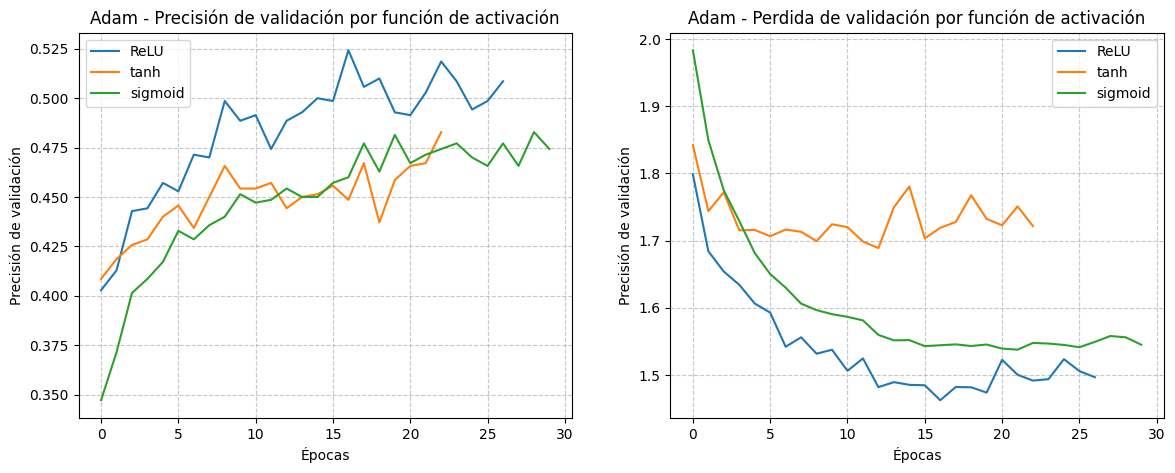

In [15]:
#@title Comparación de funciones de activación en Adam { display-mode: "form" }

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history_mlp.history['val_accuracy'], label='ReLU')
plt.plot(history_mlp_tanh.history['val_accuracy'], label='tanh')
plt.plot(history_mlp_sigmoid.history['val_accuracy'], label='sigmoid')
plt.title('Adam - Precisión de validación por función de activación')
plt.xlabel('Épocas')
plt.ylabel('Precisión de validación')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)


plt.subplot(1, 2, 2)
plt.plot(history_mlp.history['val_loss'], label='ReLU')
plt.plot(history_mlp_tanh.history['val_loss'], label='tanh')
plt.plot(history_mlp_sigmoid.history['val_loss'], label='sigmoid')
plt.title('Adam - Perdida de validación por función de activación')
plt.xlabel('Épocas')
plt.ylabel('Precisión de validación')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()





<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'>Se visualiza un mejor desempeño con la función de activación ReLu. Teniendo una mayor validacion de presicion y tambien cuenta con una menor perdida de validacion (val_loss) </font> </p>

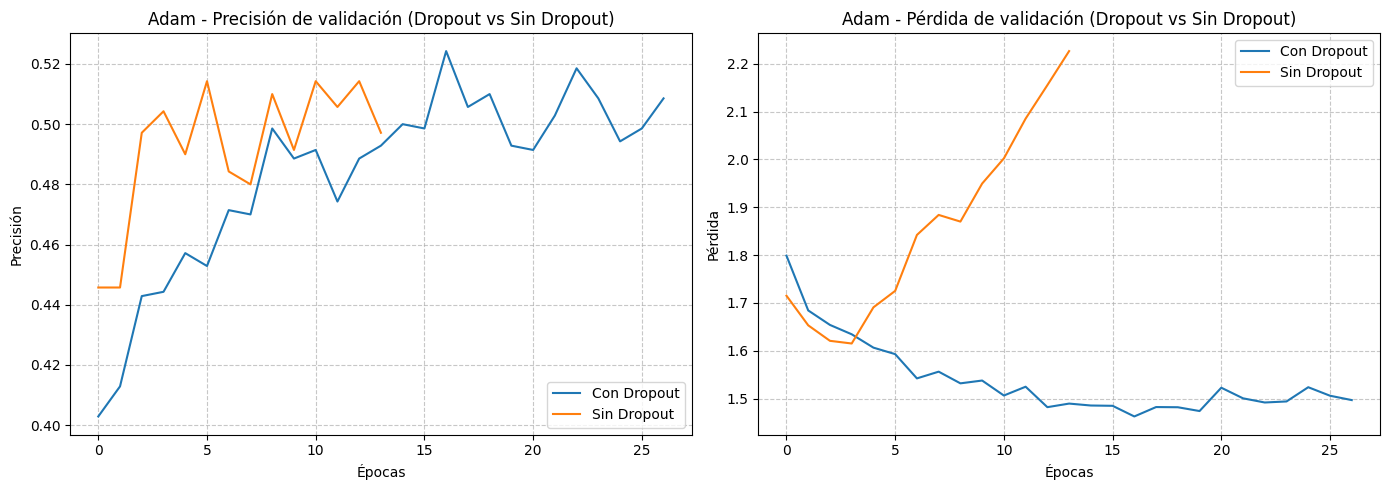

In [16]:
#@title Comparación de Dropout en Adam (Precisión y Pérdida) { display-mode: "form" }

plt.figure(figsize=(14, 5))  # SOLO UN figure

# Primer gráfico (val_accuracy)
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer subplot
plt.plot(history_mlp.history['val_accuracy'], label='Con Dropout')
plt.plot(history_mlp_no_dropout.history['val_accuracy'], label='Sin Dropout')
plt.title('Adam - Precisión de validación (Dropout vs Sin Dropout)')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Segundo gráfico (val_loss)
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo subplot
plt.plot(history_mlp.history['val_loss'], label='Con Dropout')
plt.plot(history_mlp_no_dropout.history['val_loss'], label='Sin Dropout')
plt.title('Adam - Pérdida de validación (Dropout vs Sin Dropout)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar todo junto
plt.tight_layout()
plt.show()


<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'>Como se menciono anteriormente, cuando no se usa el dropout ocurre overfitting, aún cuando tenía mayor accuracy, tiene una gran perdida en val_loss </font> </p>

In [19]:
#@title METRICAS PARA ADAM { display-mode: "form" }
#=== ADAM ===
# Diccionario para guardar resultados
adam_results = {}

# Modelos Adam
adam_models = {
    'Adam_ReLU_Dropout': model_mlp,
    'Adam_ReLU_NoDropout': model_mlp_no_dropout,
    'Adam_Tanh': model_mlp_tanh,
    'Adam_Sigmoid': model_mlp_sigmoid
}

# Evaluar cada modelo
for name, model in adam_models.items():
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    report = classification_report(y_test, y_pred_classes, output_dict=True)

    adam_results[name] = {
        'Accuracy': report['accuracy'],
        'Precision': report['macro avg']['precision'],
        'Recall': report['macro avg']['recall'],
        'F1-Score': report['macro avg']['f1-score']
    }

# Crear DataFrame
adam_df = pd.DataFrame.from_dict(adam_results, orient='index')
#print(adam_df)

from tabulate import tabulate

# Mostrar resultados Adam
print("\nResultados Adam:")
print(tabulate(adam_df, headers='keys', tablefmt='fancy_grid', floatfmt=".4f"))


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Resultados Adam:
╒═════════════════════╤════════════╤═════════════╤══════════╤════════════╕
│                     │   Accuracy │   Precision │   Recall │   F1-Score │
╞═════════════════════╪════════════╪═════════════╪══════════╪════════════╡
│ Adam_ReLU_Dropout   │     0.5243 │      0.5086 │   0.4958 │     0.4954 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Adam_ReLU_NoDropout │     0.5043 │      0.4948 │   0.4808 │     0.4829 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Adam_Tanh           │     0.4443 │      0.4201 │   0.4075 │     0.4064 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Adam_Sigmoid        │     0.4714 │      0.4479 │   0.4400 │     0.4385 │
╘═════════════════════╧════════════╧═════════════╧══════════╧════════════╛


<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'>
<dl>
  <dt>  Accuracy </dt>
  <dd>  indica la proporción de predicciones correctas en relación con el total de predicciones. Aquí, el modelo Adam_ReLU_Dropout tiene la mayor precisión (52.43%), lo que significa que está acertando más de la mitad de las veces.  </dd>
  <br>
  <dt>  Precision </dt>
  <dd>Mide la proporción de verdaderos positivos sobre el total de predicciones positivas hechas por el modelo. En este caso, el modelo Adam_ReLU_Dropout tiene la mejor precisión (50.86%)  </dd>

  <br>
  <dt>  Recall </dt>
  <dd>Indica cuántos de los ejemplos positivos fueron correctamente identificados por el modelo. El modelo Adam_ReLU_Dropout tiene el mejor recall (49.58%)</dd>

  <br>
  <dt>  F1-score </dt>
  <dd>El modelo Adam_ReLU_Dropout tiene el mejor F1-Score (0.4954), lo que refleja un buen equilibrio entre la precisión y el recall.  </dd>
</dl>
</font> </p>

### MODELO MLP SGD

<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'>MODELO SGD - Sin Dropout </font> </p>

In [30]:
# --- Modelo MLP usando SGD ---
model_mlp_sgd_no_dropout = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Flatten(),

    layers.Dense(512, activation='relu'),
    #

    layers.Dense(256, activation='relu'),
    #

    layers.Dense(num_classes, activation='softmax')
])

# Compilar usando SGD
model_mlp_sgd_no_dropout.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Reducción dinámica de la tasa de aprendizaje
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)

# Entrenar
history_mlp_sgd_no_dropout = model_mlp_sgd_no_dropout.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=40,
    callbacks=[early_stop]
)


Epoch 1/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.1475 - loss: 2.4651 - val_accuracy: 0.3529 - val_loss: 2.0648
Epoch 2/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3850 - loss: 1.9400 - val_accuracy: 0.4014 - val_loss: 1.8741
Epoch 3/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4469 - loss: 1.7596 - val_accuracy: 0.4143 - val_loss: 1.7701
Epoch 4/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4970 - loss: 1.6392 - val_accuracy: 0.4357 - val_loss: 1.6991
Epoch 5/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5238 - loss: 1.5423 - val_accuracy: 0.4486 - val_loss: 1.6503
Epoch 6/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5551 - loss: 1.4637 - val_accuracy: 0.4543 - val_loss: 1.6097
Epoch 7/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5718 - loss: 1.4072 - val_accuracy: 0.4714 - val_loss: 1.5910
Epoch 8/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5927 - loss: 1.3362 - val_accuracy: 0.4757 - v

<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'>MODELO SGD - ReLu </font> </p>

In [29]:
# --- Modelo MLP usando SGD ---
model_mlp_sgd = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Flatten(),

    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(num_classes, activation='softmax')
])

# Compilar usando SGD
model_mlp_sgd.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), # se probo tambien con 0.01
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Reducción dinámica de la tasa de aprendizaje
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)

# Entrenar
history_mlp_sgd = model_mlp_sgd.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=40,
    callbacks=[early_stop]
)


Epoch 1/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.1069 - loss: 2.8983 - val_accuracy: 0.2800 - val_loss: 2.1263
Epoch 2/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.2395 - loss: 2.3472 - val_accuracy: 0.3500 - val_loss: 1.9769
Epoch 3/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.2826 - loss: 2.1530 - val_accuracy: 0.3600 - val_loss: 1.8923
Epoch 4/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3553 - loss: 1.9913 - val_accuracy: 0.3871 - val_loss: 1.8317
Epoch 5/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3533 - loss: 1.9672 - val_accuracy: 0.4000 - val_loss: 1.7869
Epoch 6/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3752 - loss: 1.9018 - val_accuracy: 0.4100 - val_loss: 1.7461
Epoch 7/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3668 - loss: 1.8934 - val_accuracy: 0.4300 - val_loss: 1.7252
Epoch 8/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3925 - loss: 1.8109 - val_accuracy: 0.4314 - v

<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'>MODELO SGD - Tahn </font> </p>

In [32]:
# --- Modelo MLP usando SGD ---
model_mlp_sgd_tanh = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Flatten(),

    layers.Dense(512, activation='tanh'),
    layers.Dropout(0.5),

    layers.Dense(256, activation='tanh'),
    layers.Dropout(0.5),

    layers.Dense(num_classes, activation='softmax')
])

# Compilar usando SGD
model_mlp_sgd_tanh.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Reducción dinámica de la tasa de aprendizaje
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)

# Entrenar
history_mlp_sgd_tanh = model_mlp_sgd_tanh.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=40,
    callbacks=[early_stop]
)

Epoch 1/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.1491 - loss: 2.7464 - val_accuracy: 0.3414 - val_loss: 1.9694
Epoch 2/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.3153 - loss: 2.1909 - val_accuracy: 0.3771 - val_loss: 1.8327
Epoch 3/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3250 - loss: 2.1015 - val_accuracy: 0.3929 - val_loss: 1.7816
Epoch 4/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3436 - loss: 2.0201 - val_accuracy: 0.4114 - val_loss: 1.7396
Epoch 5/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3732 - loss: 1.9293 - val_accuracy: 0.4171 - val_loss: 1.7224
Epoch 6/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4076 - loss: 1.8550 - val_accuracy: 0.4214 - val_loss: 1.7029
Epoch 7/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3856 - loss: 1.8771 - val_accuracy: 0.4300 - val_loss: 1.6945
Epoch 8/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4013 - loss: 1.8093 - val_accuracy: 0.4414 - v

<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'>MODELO SGD - Sigmoid </font> </p>

In [33]:
# --- Modelo MLP usando SGD ---
model_mlp_sgd_sigmoid = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Flatten(),

    layers.Dense(512, activation='sigmoid'),
    layers.Dropout(0.5),

    layers.Dense(256, activation='sigmoid'),
    layers.Dropout(0.5),

    layers.Dense(num_classes, activation='softmax')
])

# Compilar usando SGD
model_mlp_sgd_sigmoid.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Reducción dinámica de la tasa de aprendizaje
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)

# Entrenar
history_mlp_sgd_sigmoid = model_mlp_sgd_sigmoid.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=40,
    callbacks=[early_stop]
)

Epoch 1/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.0840 - loss: 2.7691 - val_accuracy: 0.1429 - val_loss: 2.4331
Epoch 2/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.1189 - loss: 2.6666 - val_accuracy: 0.2057 - val_loss: 2.4028
Epoch 3/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.1294 - loss: 2.6118 - val_accuracy: 0.2314 - val_loss: 2.3791
Epoch 4/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.1210 - loss: 2.6207 - val_accuracy: 0.2400 - val_loss: 2.3573
Epoch 5/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.1446 - loss: 2.5436 - val_accuracy: 0.2271 - val_loss: 2.3374
Epoch 6/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.1521 - loss: 2.5042 - val_accuracy: 0.2343 - val_loss: 2.3192
Epoch 7/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.1589 - loss: 2.4994 - val_accuracy: 0.2471 - val_loss: 2.3024
Epoch 8/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.1723 - loss: 2.4696 - val_accuracy: 0.2457 - v

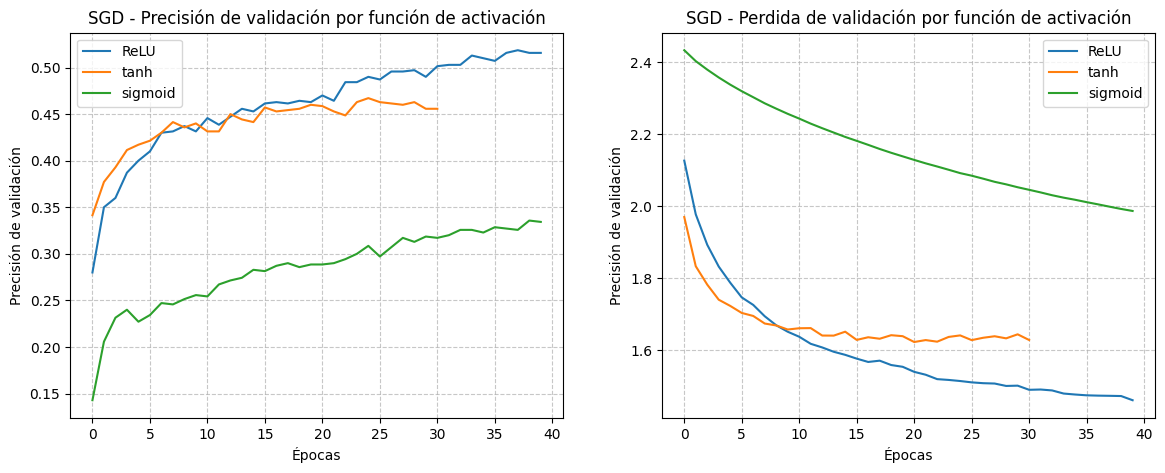

In [34]:
#@title Comparación de funciones de activación en SGD { display-mode: "form" }

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history_mlp_sgd.history['val_accuracy'], label='ReLU')
plt.plot(history_mlp_sgd_tanh.history['val_accuracy'], label='tanh')
plt.plot(history_mlp_sgd_sigmoid.history['val_accuracy'], label='sigmoid')
plt.title('SGD - Precisión de validación por función de activación')
plt.xlabel('Épocas')
plt.ylabel('Precisión de validación')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)


plt.subplot(1, 2, 2)
plt.plot(history_mlp_sgd.history['val_loss'], label='ReLU')
plt.plot(history_mlp_sgd_tanh.history['val_loss'], label='tanh')
plt.plot(history_mlp_sgd_sigmoid.history['val_loss'], label='sigmoid')
plt.title('SGD - Perdida de validación por función de activación')
plt.xlabel('Épocas')
plt.ylabel('Precisión de validación')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'>Se observa que ReLu nuevamente tiene mejor desempeño en SGD, teniendo una mayor precision y una menor perdida</font> </p>

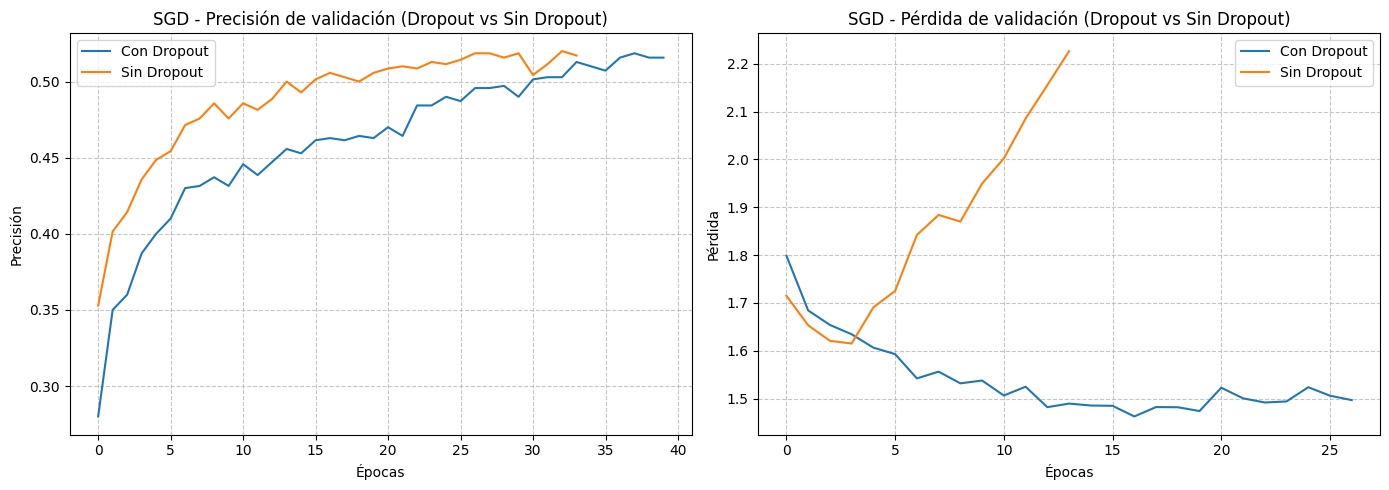

In [35]:

#@title Comparación de Dropout en SGD (Precisión y Pérdida) { display-mode: "form" }

plt.figure(figsize=(14, 5))  # SOLO UN figure

# Primer gráfico (val_accuracy)
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer subplot
plt.plot(history_mlp_sgd.history['val_accuracy'], label='Con Dropout')
plt.plot(history_mlp_sgd_no_dropout.history['val_accuracy'], label='Sin Dropout')
plt.title('SGD - Precisión de validación (Dropout vs Sin Dropout)')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Segundo gráfico (val_loss)
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo subplot
plt.plot(history_mlp.history['val_loss'], label='Con Dropout')
plt.plot(history_mlp_no_dropout.history['val_loss'], label='Sin Dropout')
plt.title('SGD - Pérdida de validación (Dropout vs Sin Dropout)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar todo junto
plt.tight_layout()
plt.show()

<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'>Se puede observar que la perdida es cosiderablemente alta en el modelo sin Dropout, comprobando lo que se dijo en el modelo MLP ADAM (sin drop) </font> </p>

In [36]:
#@title METRICAS PARA SGD { display-mode: "form" }
#=== SGD ===
# Diccionario para guardar resultados
sgd_results = {}

# Modelos SGD
sgd_models = {
    'SGD_ReLU_Dropout': model_mlp_sgd,
    'SGD_ReLU_NoDropout': model_mlp_sgd_no_dropout,
    'SGD_Tanh': model_mlp_sgd_tanh,
    'SGD_Sigmoid': model_mlp_sgd_sigmoid
}

# Evaluar cada modelo
for name, model in sgd_models.items():
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    report = classification_report(y_test, y_pred_classes, output_dict=True)

    sgd_results[name] = {
        'Accuracy': report['accuracy'],
        'Precision': report['macro avg']['precision'],
        'Recall': report['macro avg']['recall'],
        'F1-Score': report['macro avg']['f1-score']
    }

# Crear DataFrame
sgd_df = pd.DataFrame.from_dict(sgd_results, orient='index')
#print(sgd_df)

print("\nResultados SGD:")
print(tabulate(sgd_df, headers='keys', tablefmt='fancy_grid', floatfmt=".4f"))


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

Resultados SGD:
╒════════════════════╤════════════╤═════════════╤══════════╤════════════╕
│                    │   Accuracy │   Precision │   Recall │   F1-Score │
╞════════════════════╪════════════╪═════════════╪══════════╪════════════╡
│ SGD_ReLU_Dropout   │     0.5157 │      0.4864 │   0.4825 │     0.4792 │
├────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ SGD_ReLU_NoDropout │     0.5129 │      0.4981 │   0.4842 │     0.4866 │
├────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ SGD_Tanh           │     0.4586 │      0.4362 │   0.4217 │     0.4212 │
├────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ SGD_Sigmoid        │     0.3343 │      0.2437 │   0.2608 │     0.2222 │
╘════════════════════╧════════════╧═════════════╧══════════╧════════════╛


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'>
<dl>
  <dt>  Accuracy </dt>
  <dd>  El accuracy de los modelos con ReLU (con y sin dropout) es muy similar, alrededor del 51%, lo cual sigue siendo un valor bajo, pero ligeramente mejor que los modelos con Tanh o Sigmoid.  </dd>
  <br>
  <dt>  Precision </dt>
  <dd>La precision mide la proporción de predicciones positivas correctas. Los modelos con ReLU tienen una precisión bastante similar (~50%), lo que indica que están acertando bien las clases predichas como positivas.  </dd>

  <br>
  <dt>  Recall </dt>
  <dd>Los modelos con ReLU también tienen el mejor recall (~48%), lo que significa que están capturando alrededor de la mitad de los ejemplos positivos correctamente.</dd>

  <br>
  <dt>  F1-score </dt>
  <dd>El F1-Score es una combinación de precision y recall, y de nuevo muestra que los modelos con ReLU (especialmente el que tiene dropout) tienen el mejor rendimiento global.  </dd>
</dl>
</font> </p>

## EXTRA

### <p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'>Esto es un extra, en mi error use al principio una red CNN y no MLP, la dejo aquí, si no suma nada, ignorar </font> </p>

### <p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'>Modelo sin augmentation </font> </p>

<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'>Para el modelo se utilizara un red CNN (Convolutional Neural Network)</font> </p>

<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'>
<ul type = "square">
  <li>Tres bloques de Conv2D + MaxPooling2D</li>
  <li>Aplanar con Flatten</li>
  <li>Agregar Dropout, ayuda a prevenir el sobreajuste apagando aleatoriamente las neuronas durante el entrenamiento</li>
  <li>Dos Dense (la última con softmax para clasificación)</li>
<ul></font> </p>




In [16]:
#-- Modelo sin data augmentation --
model_base = models.Sequential([
    layers.Input(shape=(32, 32, 3)),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'), #Conv2D extraen características locales de la imagen (bordes, texturas, patrones).
    layers.MaxPooling2D((2, 2)), #MaxPooling2D reduce el tamaño para quedarse con lo más importante y evitar sobreajuste

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(), #Flatten convierte la salida en un vector para poder pasarla a las capas totalmente conectadas que hacen la clasificación
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model_base.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])


<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'>Entrenamiento del modelo 01 (sin augmentation) </font> </p>

In [ ]:
#-- Entrenamiento sin augmentation --
history_base = model_base.fit(
    train_dataset,
    epochs=10,
    validation_data=test_dataset
)

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 172ms/step - accuracy: 0.1856 - loss: 2.3337 - val_accuracy: 0.4129 - val_loss: 1.8124
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - accuracy: 0.4172 - loss: 1.7405 - val_accuracy: 0.4543 - val_loss: 1.5993
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 175ms/step - accuracy: 0.4904 - loss: 1.5526 - val_accuracy: 0.5386 - val_loss: 1.3822
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 209ms/step - accuracy: 0.5523 - loss: 1.3744 - val_accuracy: 0.5843 - val_loss: 1.2866
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - accuracy: 0.5782 - loss: 1.2478 - val_accuracy: 0.6043 - val_loss: 1.1925
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 215ms/step - accuracy: 0.6406 - loss: 1.1142 - val_accuracy: 0.6014 - val_loss: 1.2321
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 213ms/step - accuracy: 0.6443 - loss: 1.0376 - val_accuracy: 0.6100 - val_loss: 1.1777
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - accuracy: 0.6825 - loss: 0.9424 - val_accuracy: 

### <p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'>Modelo con Augmentation </font> </p>

<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'>Para el modelo se utilizara la misma red CNN (Convolutional Neural Network), se le agregara lo siguiente:</font> </p>

<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'>
<ul type = "square">
  <li>Aplicar técnica de Augmentation (modificar imágenes de entrenamiento)</li>
  <li>Se añaden BatchNormalization después de cada Conv2D para estabilizar y acelerar el entrenamiento.</li>
  <li>Se refuerza el modelo con más capas y Dropout.</li>

<ul></font> </p>


In [11]:
#-- Aumento de datos más controlado (Augmentation) --
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.05),
        layers.RandomZoom(0.05),
        layers.RandomTranslation(0.05, 0.05),
    ]
)


# MODELO
model_aug = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    data_augmentation,

    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(np.unique(y_train)), activation='softmax')
])

# Compilar
model_aug.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'>Entrenamiento del modelo 02 (con augmentation) </font> </p>

In [ ]:
#-- Entrenamiento con Augmentation--
early_stop = keras.callbacks.EarlyStopping(patience=12, restore_best_weights=True)

history_aug = model_aug.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=30,
    callbacks=[early_stop]
)


Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 36s 654ms/step - accuracy: 0.2497 - loss: 2.9279 - val_accuracy: 0.0757 - val_loss: 3.0106
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 24s 544ms/step - accuracy: 0.4384 - loss: 1.7254 - val_accuracy: 0.1286 - val_loss: 4.6311
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 40s 517ms/step - accuracy: 0.5063 - loss: 1.4881 - val_accuracy: 0.0729 - val_loss: 7.4723
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 29s 664ms/step - accuracy: 0.5208 - loss: 1.4430 - val_accuracy: 0.1171 - val_loss: 5.5300
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 23s 517ms/step - accuracy: 0.5573 - loss: 1.3060 - val_accuracy: 0.1214 - val_loss: 5.2214
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 40s 508ms/step - accuracy: 0.5936 - loss: 1.1987 - val_accuracy: 0.2129 - val_loss: 3.3136
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 44s 570ms/step - accuracy: 0.6149 - loss: 1.1424 - val_accuracy: 0.2443 - val_loss: 3.0100
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 43s 626ms/step - accuracy: 0.6251 - loss: 1.1065 - val_accu

<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'>Graficos</font> </p>

In [14]:
# --- Entrenamiento MLP con otro batch size ---
train_dataset_128 = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(1000).batch(128)
test_dataset_128 = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(128)

history_mlp_bs128 = model_mlp.fit(
    train_dataset_128,
    validation_data=test_dataset_128,
    epochs=20,
    callbacks=[early_stop]
)


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.5619 - loss: 1.3129 - val_accuracy: 0.5014 - val_loss: 1.4647
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.6081 - loss: 1.1747 - val_accuracy: 0.4929 - val_loss: 1.4473
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5908 - loss: 1.1831 - val_accuracy: 0.5029 - val_loss: 1.4550
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.6255 - loss: 1.1033 - val_accuracy: 0.4986 - val_loss: 1.4530
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6220 - loss: 1.0603 - val_accuracy: 0.5157 - val_loss: 1.4265
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.6566 - loss: 1.0154 - val_accuracy: 0.5157 - val_loss: 1.4456
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6615 - loss: 0.9972 - val_accuracy: 0.5086 - val_loss: 1.4756
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6535 - loss: 1.0197 - val_accuracy: 0.4986 - v

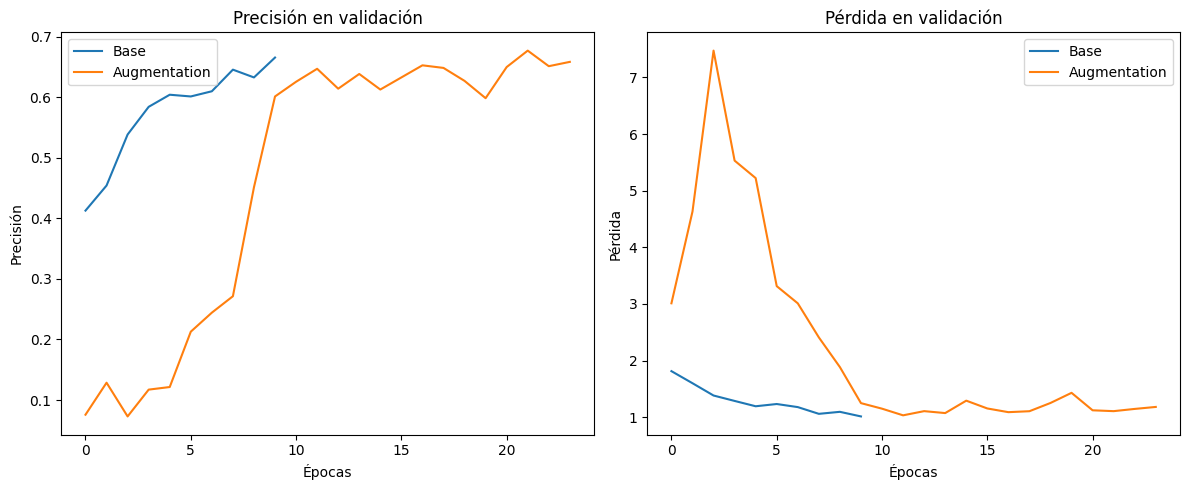

In [ ]:
# Precisión
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_base.history['val_accuracy'], label='Base')
plt.plot(history_aug.history['val_accuracy'], label='Augmentation')
plt.title("Precisión en validación")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history_base.history['val_loss'], label='Base')
plt.plot(history_aug.history['val_loss'], label='Augmentation')
plt.title("Pérdida en validación")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.legend()

plt.tight_layout()
plt.show()


<p align = 'justify'> <font face="Comic Sans MS" size=4 color='#d39aed'>Si bien, el modelo con Augmentation tiene más dificultad en el aprendizaje al inicio, genera un modelo más robusto.</font> </p>

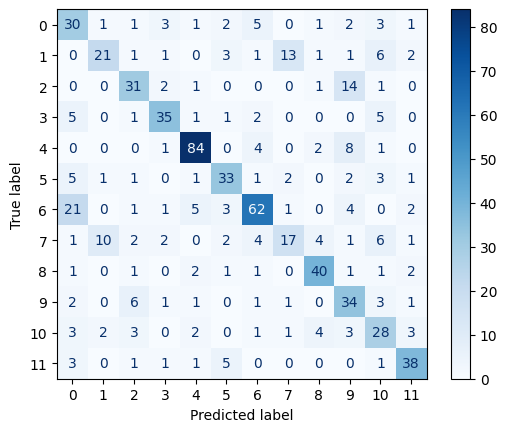

In [ ]:
#@title Matriz de confusion modelo Augmentation { display-mode: "form" }
# Obtener predicciones
y_pred_probs = model_aug.predict(test_dataset)
y_pred = np.argmax(y_pred_probs, axis=1)

# Extraer etiquetas verdaderas del dataset
y_true = np.concatenate([y for x, y in test_dataset], axis=0)

# Crear matriz
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()


In [ ]:
#@title Funcion de grilla { display-mode: "form" }
def mostrar_grilla_comparativa(label_a, label_b, X_test, y_test, num_images=15):
    # Obtener índices para cada label
    idx_a = np.where(y_test == label_a)[0][:num_images]
    idx_b = np.where(y_test == label_b)[0][:num_images]

    # Igualar cantidad de imágenes (por si hay menos de un lado)
    n = min(len(idx_a), len(idx_b), num_images)

    plt.figure(figsize=(10, 2 * n))

    for i in range(n):
        # Imagen izquierda (label A)
        plt.subplot(n, 2, 2 * i + 1)
        img_a = np.clip((X_test[idx_a[i]] + 1.0) * 127.5, 0, 255).astype(np.uint8)
        plt.imshow(img_a)
        plt.title(f"Label {label_a}")
        plt.axis('off')

        # Imagen derecha (label B)
        plt.subplot(n, 2, 2 * i + 2)
        img_b = np.clip((X_test[idx_b[i]] + 1.0) * 127.5, 0, 255).astype(np.uint8)
        plt.imshow(img_b)
        plt.title(f"Label {label_b}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


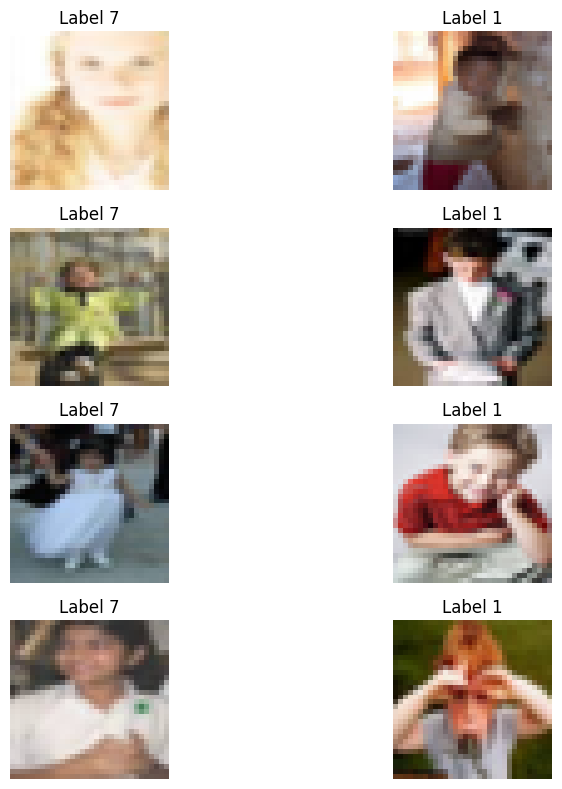

In [ ]:
#-- INGRESAR LABELS A COMPARAR --
mostrar_grilla_comparativa(label_a=7, label_b=1, X_test=X_test, y_test=y_test, num_images=4)
